# Проект курса ML1 Анализ веб-документов

## 0. Приветствие

Здравствуйте, уважаемые студенты! Рады представить Вам проект по анализу данных. Этот проект поможет Вам на практике попробовать не только те техники, которые мы рассказываем в курсе, но и, возможно, изобрести что-то новое, уникальное. Хотелось, чтобы этот ноутбук не только рассказывал про проект, но и дал Вам некоторые ориентиры, как в принципе стоит подходить к решению незнакомой задачи анализа данных. Надеемся, что наши советы окажутся Вам интересны и помогут скорее стать большим профессионалом.

Удачи! Будет интересно!

## 1. Обзор проекта

Во множестве прикладных задач возникает необходимость разбить веб-страницы на какие-то определенные группы, где в каждой группе страницы будут очень похожи по смыслу. Например, представим, что Вы владелец сервиса интернет рекламы. Вашим клиентам хочется, чтобы их услуги рекламировались не на каком-то определенном сайте, а на всех сайтах их тематики. То есть Вам нужна какая-то тематическая разметка сайтов в интернете по множеству тематик, и клиент сможет выбрать любую, какая ему больше нравится. Как же такую разметку сделать?

Самый простой способ - разметить людьми множество сайтов в интернете на множество тем, настроить на этой выборке многоклассовый классификатор и сделать предсказанием на всем оставшемся "интернете". Однако, в таком подходе возникает несколько проблем. Во-первых, непонятно откуда брать само множество тем, на которое размечать. Во-вторых, даже если множество тем зафиксировано, не очень понятно, откуда для каждой темы брать примеры, чтобы добавить их в обучающее множество.

В данном задании мы предлагаем Вам попробовать другое решение. Пусть тематику задают сами данные! Разделим наши веб-страницы на множество групп, например, просто по словам в веб-страницах. В такой группе буду как документы об одном и том же, так и "аномалии", которые имеют схожие слова, но не соответствуют документам основной тематики. Например, в такой группе может содержаться подмножество веб-страниц про "ремонт пластиковых окон" и аномалии вроде "пластиковые игрушки", "ремонт квартир" и так далее. Нам останется только выделить подмножество документов одной темы, то есть все документы, которые про "ремонт пластовых окон" и убрать все аномалии. Затем подмножество как-то проименуем, чтобы показать клиенту, но этим Вы уже займетесь, когда будете продавать Вашу систему :)

В задании Вам предлагается работать с 28026 веб-страницами, которые уже скачаны и лежат в архиве content.tar.gz. Эти страницы разбиты по группам, каждая группа около 100 страниц. Каждая группа соответствует какой-то определенной теме, которая Вам неизвестна. Обучающее множество состоит из 129 групп. В обучающих группах ручной разметкой было проставлено, соответствует ли данный документ теме группы (target = 1) или это аномалия (target = 0). Тестовое множество состоит из 180 групп. Вам необходимо проставить для них target. Важно отметить, что обучающие и тестовые группы не пересекаются. Гарантируется, что в каждой группе есть подмножество документов из ее темы.

Далее будем называть веб-страницы, которые соотвествуют теме группы, "настоящими", а которые не соотвествуют - "выбросами".

Любой аналитик данных первым делом должен посмотреть на сами данные. Возьмем две группы из обучающего множества и посмотрим на две настоящих страницы и на выброс.

Группа 3. Настоящий объект
![title](images/g3_true_1.png)

Группа 3, Настоящий объект
![image.png](images/g3_true_2.png)

Группа 3. Выброс
![image.png](images/g3_outlier.png)


Кажется, что довольно просто. А посложнее?

Группа 1. Настоящий объект
![image.png](images/g1_true_1.png)

Группа 1. Настоящий объект.
![image.png](images/g1_true_2.png)

Группа 1. Выброс
![image.png](images/g1_outlier.png)

Задача выглядит сложно, но человек с ней справляется, а значит есть шанс, что машина тоже справится.

## 2. Обзор данных

Перечислим, какие данные мы дали для решения конкурса.

1) Контент веб-страниц

Лежит в архиве content.tar.gz. В директориии 28026  веб-страниц, с которыми мы будем работать в конкурсе. Парсить их можно с помощью волшебной библиотеки BeautifulSoup. Рекомендуется почитать в интернете как строится html, чтобы понимать, какие данные можно извлечь из веб-страницы и почитать мануал по этой билиотеке https://www.crummy.com/software/BeautifulSoup/bs4/doc/ Во всех файлах .dat первой строчкой указан урл веб-страницы, на случай, если Вы захотите скачать веб-страницу самостоятельно или использовать урл в качестве признаков.

##Распаковка данных

In [ ]:
from    google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!tar -xvzf /content/drive/MyDrive/ML_Project/content.tar.gz

Выходные данные были обрезаны до нескольких последних строк (5000).
content/742.dat
content/20931.dat
content/24230.dat
content/9287.dat
content/26348.dat
content/13592.dat
content/7208.dat
content/18629.dat
content/7767.dat
content/12277.dat
content/5890.dat
content/49.dat
content/19983.dat
content/14032.dat
content/2146.dat
content/14308.dat
content/17796.dat
content/18147.dat
content/20575.dat
content/811.dat
content/13098.dat
content/2248.dat
content/11849.dat
content/8895.dat
content/5624.dat
content/15295.dat
content/10879.dat
content/2552.dat
content/6185.dat
content/500.dat
content/21192.dat
content/20145.dat
content/11367.dat
content/5550.dat
content/14626.dat
content/22680.dat
content/5791.dat
content/25903.dat
content/1875.dat
content/5333.dat
content/1830.dat
content/15104.dat
content/4652.dat
content/17812.dat
content/23446.dat
content/18585.dat
content/14085.dat
content/26967.dat
content/15994.dat
content/23425.dat
content/4896.dat
content/19747.dat
content/15583.dat
cont

In [ ]:
! pip install lxml

In [ ]:
!ls

cc.ru.300.bin.gz.part  docs_titles.tsv	group_1   sample_data	   train_groups.csv
content		       drive		group_33  test_groups.csv


##Выделение одной группы

In [ ]:
doc_ids_group_1 = train_groups[train_groups['group_id'] == 1]['doc_id']
doc_ids_group_1_list = doc_ids_group_1.tolist()
doc_ids_group_1_list

[15731,
 14829,
 15764,
 17669,
 14852,
 15458,
 14899,
 16879,
 16310,
 15440,
 16242,
 16383,
 15580,
 16840,
 17519,
 15185,
 15016,
 17796,
 17507,
 16929,
 17389,
 16272,
 16057,
 15641,
 17356,
 15222,
 16105,
 17781,
 15763,
 15556,
 16178,
 17639,
 17105,
 15068,
 17176,
 17240,
 14999,
 15217,
 15613,
 15942,
 16072,
 16052,
 17819,
 17339,
 17135,
 17733,
 15631,
 15558,
 16650,
 15114,
 16598,
 15835,
 15564,
 15430,
 15555,
 15820,
 15817,
 17336,
 17835,
 16627,
 16786,
 15642,
 17652,
 16595,
 15233,
 17478,
 16367,
 14961,
 15400,
 15890,
 15655,
 15578,
 16565,
 16124,
 15106,
 15690,
 15934,
 15968,
 15154,
 17077,
 17716,
 16683,
 15498,
 15943,
 16818,
 16352,
 17690,
 16487,
 16295,
 16233,
 15678,
 15966,
 16893,
 17081,
 16657,
 16279,
 15156,
 16184,
 17050,
 15734,
 16407,
 14929]

In [ ]:
doc_ids_group_33 = train_groups[train_groups['group_id'] == 33]['doc_id']
doc_ids_group_33_list = doc_ids_group_33.tolist()
doc_ids_group_33_list

[3337,
 1599,
 2089,
 2916,
 1325,
 3517,
 2553,
 1278,
 982,
 3101,
 2973,
 1396,
 806,
 3987,
 801,
 1945,
 92,
 1624,
 2578,
 3385,
 1835,
 2908,
 1935,
 2442,
 1633,
 3054,
 969,
 3244,
 2577,
 3174,
 2929,
 110,
 2837,
 783,
 343,
 2172,
 2755,
 586,
 1233,
 3278,
 1046,
 765,
 420,
 3242,
 1553,
 1484,
 1740,
 77,
 3669,
 1264,
 1360,
 2226,
 1759,
 2761,
 2458,
 3138,
 3951,
 1259,
 2205,
 1078,
 2251,
 682,
 3347,
 3888,
 2896,
 2013,
 3013,
 2547,
 3426,
 2982,
 959,
 2831,
 2764,
 665,
 3193,
 374,
 3387,
 884,
 2465,
 3106,
 1135,
 960,
 1683,
 1944,
 1324,
 3683,
 3944,
 809,
 3701,
 2085,
 1187,
 1897,
 3502]

In [ ]:
import os
import shutil

content_path = '/content/content'
output_path_group_1 = '/content/group_1'
output_path_group_33 = '/content/group_33'

os.makedirs(output_path_group_33, exist_ok=True)

for doc_id in doc_ids_group_33_list:
    file_name = f"{doc_id}.dat"
    src_file_path = os.path.join(content_path, file_name)
    dst_file_path = os.path.join(output_path_group_33, file_name)

    if os.path.exists(src_file_path):
        shutil.copy(src_file_path, dst_file_path)
        print(f"Copied: {file_name}")
    else:
        print(f"File not found: {file_name}")

Copied: 3337.dat
Copied: 1599.dat
Copied: 2089.dat
Copied: 2916.dat
Copied: 1325.dat
Copied: 3517.dat
Copied: 2553.dat
Copied: 1278.dat
Copied: 982.dat
Copied: 3101.dat
Copied: 2973.dat
Copied: 1396.dat
Copied: 806.dat
Copied: 3987.dat
Copied: 801.dat
Copied: 1945.dat
Copied: 92.dat
Copied: 1624.dat
Copied: 2578.dat
Copied: 3385.dat
Copied: 1835.dat
Copied: 2908.dat
Copied: 1935.dat
Copied: 2442.dat
Copied: 1633.dat
Copied: 3054.dat
Copied: 969.dat
Copied: 3244.dat
Copied: 2577.dat
Copied: 3174.dat
Copied: 2929.dat
Copied: 110.dat
Copied: 2837.dat
Copied: 783.dat
Copied: 343.dat
Copied: 2172.dat
Copied: 2755.dat
Copied: 586.dat
Copied: 1233.dat
Copied: 3278.dat
Copied: 1046.dat
Copied: 765.dat
Copied: 420.dat
Copied: 3242.dat
Copied: 1553.dat
Copied: 1484.dat
Copied: 1740.dat
Copied: 77.dat
Copied: 3669.dat
Copied: 1264.dat
Copied: 1360.dat
Copied: 2226.dat
Copied: 1759.dat
Copied: 2761.dat
Copied: 2458.dat
Copied: 3138.dat
Copied: 3951.dat
Copied: 1259.dat
Copied: 2205.dat
Copied: 107

Смотрим на распределение таргета в группе 33

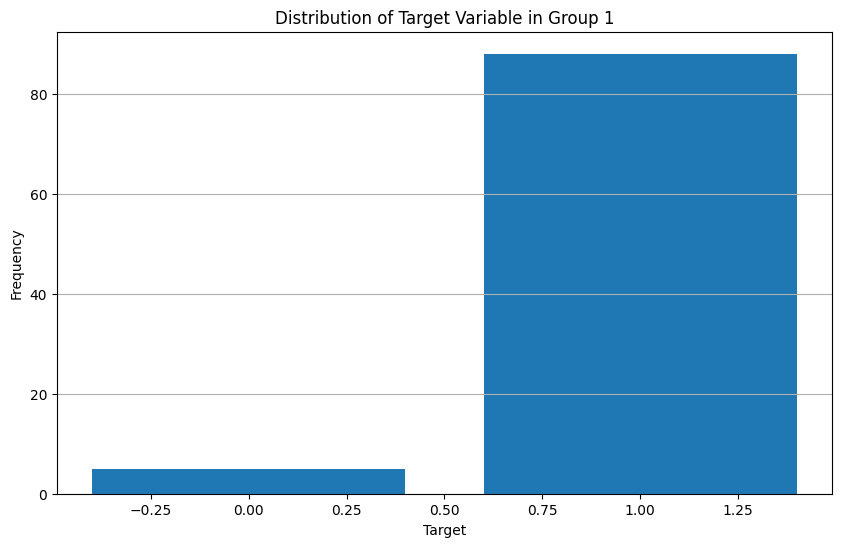

In [ ]:
group_33_data = train_groups[train_groups['group_id'] == 33]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(group_33_data['target'], bins=range(group_33_data['target'].min(), group_33_data['target'].max() + 2), align='left', rwidth=0.8)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable in Group 1')
plt.grid(axis='y')

plt.show()

##Предобработка текста, токенизация

In [ ]:
!pip install nltk
!pip install fasttext
!pip install pymystem3

In [ ]:
from bs4 import BeautifulSoup
import codecs
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from string import punctuation
from pymystem3 import Mystem


nltk.download('punkt', quiet=True)
nltk.download("stopwords", quiet=True)
noise = stopwords.words('russian') + list(punctuation)

def extract_clean_text(file_path):
    # Открываем и читаем содержимое файла
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Создаем объект BeautifulSoup
    soup = BeautifulSoup(content, 'lxml')

    # Удаляем элементы, относящиеся к рекламе
    ad_keywords = ['ad', 'banner', 'sponsor', 'advertisement']
    for keyword in ad_keywords:
        for tag in soup.find_all(True, class_=re.compile(keyword, re.I)):
            tag.decompose()
        for tag in soup.find_all(True, id=re.compile(keyword, re.I)):
            tag.decompose()

    for a_tag in soup.find_all('a'):
        a_tag.decompose()

    # Извлекаем текст
    text = soup.get_text(separator=' ')

    # Удаляем символы /n и лишние пробелы
    clean_text = ' '.join(text.split())

    # return clean_text
    return clean_text


def tokenize_text(text):
    tokens = nltk.word_tokenize(text.lower(), language='russian')
    tokens = [token for token in tokens
              if token not in noise
              and (len(token) > 1 or ord(token) < 128)]
    return tokens

def custom_tokenizer_and_lem(text):
    mystem_analyzer = Mystem(grammar_info=False, entire_input=False)
    tokens = mystem_analyzer.lemmatize(text)
    tokens = [token for token in tokens
          if token not in noise
          and (len(token) > 1 or ord(token) < 128)]
    return tokens

In [ ]:
clean_text = extract_clean_text('content/1046.dat')
# # tokens = tokenize_text(clean_text)
tokens_lem = custom_tokenizer_and_lem(clean_text)
tokens_lem

['com',
 'sous',
 'guakamole',
 'рецепт',
 'приготовление',
 'гуакамола',
 'постный',
 'рецепт',
 'постный',
 'блюдо',
 'постный',
 'стол',
 'еда',
 'тип',
 'блюдо',
 'популярный',
 'ингредиент',
 'просто',
 'замечательно',
 'возможность',
 'отдыхать',
 'поговорить',
 'чашечка',
 'чай',
 'кофе',
 'куриный',
 'грудка',
 'это',
 'полезный',
 'мясо',
 'самый',
 'безопасный',
 'филе',
 'куриный',
 'считаться',
 'идеальный',
 'кулинарный',
 'рецепт',
 'холодный',
 'закуска',
 'соус',
 'гуакамола',
 'май',
 'соус',
 'гуакамола',
 'очень',
 'популярный',
 'мексика',
 'известный',
 'мир',
 'множество',
 'вариация',
 'степень',
 'измельчение',
 'ингредиент',
 'отличаться',
 'основа',
 'гуакамола',
 'составлять',
 'авокадо',
 'перец',
 'чили',
 'лук',
 'придавать',
 'острота',
 'лаймовый',
 'сок',
 'кориандр',
 'аромат',
 'пикантность',
 'великолепно',
 'сочетаться',
 'тортилья',
 'мясной',
 'блюдо',
 'приготавливать',
 'мексиканский',
 'соус',
 'гуакамола',
 'понадобиться',
 'следующий',
 'ингр

##Создание датасета группы

In [ ]:
def load_and_parse_documents(doc_ids, content_path):
    data = []
    for doc_id in doc_ids:
        file_path = os.path.join(content_path, f"{doc_id}.dat")
        if os.path.exists(file_path):
            text = extract_clean_text(file_path)
            # data.append({'doc_id': doc_id, 'clean_text': text})
            tokens = custom_tokenizer_and_lem(text)
            data.append({'doc_id': doc_id, 'tokens': tokens})
    return pd.DataFrame(data)

In [ ]:
df_group_33 = load_and_parse_documents(doc_ids_group_33_list, output_path_group_33)

In [ ]:
df_group_33.head()

,doc_id,tokens
0,3337,"[prorecepty, com, sousy, guakamole, html, гуак..."
1,1599,"[info, cook, recipe, Guakamole, html, гуакамол..."
2,2089,"[happyandnatural, com, meksikanskoe, guakamole..."
3,2916,"[foodzona, ru, recipes, приготавливать, гуакам..."
4,1325,"[telo, v, delo, ru, prostyie, retseptyi, guaka..."


In [ ]:
def count_common_words(tokens1, tokens2):
    return len(set(tokens1) & set(tokens2))

In [ ]:
common_words_counts = []

for i, row_i in df_group_33.iterrows():
    doc_id_i = row_i['doc_id']
    tokens_i = row_i['tokens']
    common_words = []

    for j, row_j in df_group_33.iterrows():
        if i != j:
            tokens_j = row_j['tokens']
            common_words.append(count_common_words(tokens_i, tokens_j))

    common_words_counts.append({
        'doc_id': doc_id_i,
        'common_words': sorted(common_words, reverse=True)[:15]  # Храним топ-15 количеств общих слов
    })

# Создание DataFrame для хранения результатов
df_common_words = pd.DataFrame(common_words_counts)

# Вывод результатов
for _, row in df_common_words.iterrows():
    print(f"Document ID: {row['doc_id']}, Top-15 common words counts: {row['common_words']}")

Document ID: 3337, Top-15 common words counts: [150, 122, 120, 114, 112, 107, 105, 105, 100, 98, 97, 97, 95, 95, 95]
Document ID: 1599, Top-15 common words counts: [56, 56, 55, 54, 51, 51, 50, 49, 49, 49, 48, 48, 48, 48, 47]
Document ID: 2089, Top-15 common words counts: [110, 95, 92, 91, 91, 84, 84, 83, 83, 83, 81, 80, 80, 79, 77]
Document ID: 2916, Top-15 common words counts: [121, 86, 82, 76, 71, 70, 70, 68, 67, 67, 65, 64, 64, 64, 63]
Document ID: 1325, Top-15 common words counts: [9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Document ID: 3517, Top-15 common words counts: [133, 118, 117, 106, 106, 106, 105, 104, 104, 102, 99, 99, 99, 97, 97]
Document ID: 2553, Top-15 common words counts: [86, 77, 76, 75, 73, 73, 73, 70, 66, 65, 65, 64, 64, 64, 63]
Document ID: 1278, Top-15 common words counts: [157, 122, 120, 116, 115, 115, 110, 110, 108, 106, 105, 105, 103, 102, 102]
Document ID: 982, Top-15 common words counts: [299, 136, 112, 110, 109, 108, 108, 103, 103, 99, 98, 97, 94, 94, 94]

##Векторизация

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer_and_lem)

X_train_cv = vectorizer.fit_transform(df_group_33['clean_text'])

print(len(vectorizer.vocabulary_))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


4248


In [ ]:
vectorizer.vocabulary_

{'prorecepty': 398,
 'com': 82,
 'sousy': 475,
 'guakamole': 195,
 'html': 213,
 'гуакамола': 1128,
 'рецепт': 3250,
 'приготовление': 2951,
 'пикантный': 2603,
 'соус': 3565,
 'добавлять': 1208,
 'приготавливать': 2950,
 'мексиканский': 1969,
 'популярный': 2808,
 'весь': 849,
 'мир': 2011,
 'история': 1557,
 'насчитывать': 2138,
 'несколько': 2230,
 'сотня': 3563,
 'тысяча': 3850,
 'год': 1079,
 'тысячелетие': 3851,
 'назад': 2096,
 'древний': 1255,
 'ацтек': 681,
 'культивировать': 1813,
 'авокадо': 591,
 'главный': 1067,
 'ингредиент': 1501,
 'вполне': 953,
 'возможно': 923,
 'индеец': 1506,
 'готовить': 1099,
 'что-то': 4141,
 'напоминать': 2118,
 'классический': 1660,
 'испанский': 1543,
 'конкистадор': 1711,
 'находить': 2149,
 'блюдо': 753,
 'достойный': 1249,
 'упоминание': 3922,
 'записка': 1384,
 'завоевание': 1327,
 'америка': 630,
 'европа': 1270,
 'попадать': 2798,
 'лишь': 1881,
 'xx': 565,
 'век': 828,
 'зеленый': 1425,
 'ягода': 4228,
 'предмет': 2902,
 'массовый': 195

In [ ]:
from bs4 import BeautifulSoup
import codecs
path = 'content/'
filename = '1.dat'
with codecs.open(path + filename, 'r', 'utf-8') as f:
    soup = BeautifulSoup(f, 'lxml')
print(soup)
title = soup.title.text
text = soup.get_text()

# print(title)
# print(text)

<html><body><p>zrenielib.ru/docs/index-5141.html
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

</p><meta content="3QVD0LJDN7k3wFyeSLVyElwMDqalhHUMzsQJbGKkByo" name="google-site-verification"/>
<link href="/images/favicon.png" rel="shortcut icon" type="image/png"/>
<title>М. Б. Аншина Центр репродукции и генетики «ФертиМед», г. Москва</title>
<base href="http://zrenielib.ru/tw_refs/6/5141/"/><meta content="Тип: Реферат; Размер: 260.22 Kb.; Резюме: в статье систематизированы клинические и лабораторные данные, свидетельствующие об эндокринных расстройствах, приводящих к бесплодию, или сопутствующих ему. Даны рекомендации по рационализации и минимизации числа лабораторных анализов на этапе обследования пациентов с бесплодием" name="description"/><meta content="М. Б. Аншина Центр репродукции и генетики «ФертиМед», г. Москва документы рефераты сочинения гдз" name="keywords"/><meta content="text/html; charset=utf-8" 

In [ ]:
# Пример, как можно достать урл и заголовок веб-страницы
from bs4 import BeautifulSoup
import codecs
path = 'content/'
filename = '1.dat'
with codecs.open(path + filename, 'r', 'utf-8') as f:
    url = f.readline().strip()
    title = BeautifulSoup(f, 'lxml').title.text

2) Заголовки веб-страниц
Парсинг веб-страниц занимает довольно много времени (порядка секунды на страницу), поэтому для этой демонстрации и домашних работ мы извлекли из них заголовки и сохранили. Лежат в файле docs_titles.tsv.  Для решения проекта настоятельно рекомендуется не использовать этот файл, а извлечь данные самому, так как страница соотвествует множество полезной информации помимо заголовка.

In [ ]:
import pandas as pd
title_data = pd.read_csv('docs_titles.tsv', sep='\t', encoding='utf-8', lineterminator='\n')
title_data.head()

,doc_id,title
0,15731,ВАЗ 21213 | Замена подшипников ступицы | Нива
1,14829,"Ваз 2107 оптом в Сочи. Сравнить цены, купить п..."
2,15764,Купить ступица Лада калина2. Трансмиссия - пер...
3,17669,Классика 21010 - 21074
4,14852,Ступица Нива — замена подшипника своими руками


Пандас довольно криво работает с текстами, так что я рекомендую считывать этот файл "руками", чтобы корректно все обработать.

3) Соответствия веб-страниц группам. Группы обучения это train_groups.csv, группы предсказания test_groups.csv

In [ ]:
train_groups = pd.read_csv('train_groups.csv')
print (train_groups.shape)
train_groups.head()

(11690, 4)


,pair_id,group_id,doc_id,target
0,1,1,15731,0
1,2,1,14829,0
2,3,1,15764,0
3,4,1,17669,0
4,5,1,14852,0


doc_id - Уникальный идентификатор веб-страницы

group_id - Уникальный идентификатор группы веб-страниц, среди которой нужно найти подмножество одной тематики

pair_id - Уникальный идентификатор пары (group_id, doc_id)

target - Значение, которое нужно предсказать. 1 - страница настоящая, 0 - выброс

In [ ]:
test_groups = pd.read_csv('test_groups.csv')
print (test_groups.shape)
test_groups.head()

(16627, 3)


,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


Важно отметить, обучающие и тестовые группы не пересекаются.

То есть нужно предсказать, какие веб-страницы являются настоящими для тестовых групп, когда у Вас нет ни одного настоящего примера из этих групп.

4) Пример предсказания на тестовом множестве sample_submission.csv

In [ ]:
sample_subm = pd.read_csv('sample_submission.csv')
print (sample_subm.shape)
sample_subm.head()

(16627, 2)


,pair_id,target
0,11691,0
1,11692,1
2,11693,0
3,11694,1
4,11695,0


## 3. Пример предсказания

Как же такую задачу решать? В  анализе данных нет правильного решения. Здесь никому не важен алгоритм которым Вы решали, данные которые Вы использовали. Важен финальный результат.
Нам понравится любое решение, которое будет хорошо решать задачу :) Далее мы будем рассказывать, как нам кажется  стоит решать эту задачу, но Вы вольны делать ее, как Вам больше нравится.

При решении любой задачи анализа данныъ нужно определить, что является объектом, то есть для какой сущности мы хотим делать предсказания. В этой задаче объектом является пара (группа, веб-страница). Не имеет большого смысла говорить просто об объекте, без какой-либо привязки  к группе. Поэтому большинство признаков должно одновременно описывать отношение объекта с группой.


С этой точки зрения на наша задача превращается во что-то подобное:

![title](images/anomaly_example.png)

То есть в группе есть множество страниц, тесно друг с другом связанных, а есть страницы, которые не связаны  или слабо связаны с другими страницами в группе. Очевидно, первые -- настоящие, а вторые -- выбросы. Как задать величину "связи"?  Самый простой и очевидный способ -- число общих слов в заголовках!

Сделаем датасет с признаками вида "макс число общих слов с другими объектами из группы", "предмакс число общих слов с другими объектами из группы" ...

Создаем словарь "doc_id" -> "title"

In [ ]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        # doc_id + текст заголовка
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [ ]:
doc_to_title

Перегоняем пандас в словарь, потому что я не люблю пандас :(

Создаем словарь "group_id" -> (doc_id, title, target) - распределяем документы по группам

In [ ]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [ ]:
len(traingroups_titledata)

129

Возьмем любую группу и посмотрим сколько общих слов с другими страницами из группы у настоящей веб-страницы и у выброса.  Номера объектов мы подсмотрели заранее.

In [ ]:
check_group_id = 3
outlier_doc_num = 0
true_doc_num = 2

outlier_doc_words = set(traingroups_titledata[check_group_id][outlier_doc_num][1].split())
true_doc_words = set(traingroups_titledata[check_group_id][true_doc_num][1].split())

outlier_doc_intersect = []
true_doc_intersect = []

# Проходимся по всем документам группы
for i in range(len(traingroups_titledata[check_group_id])):
    # Берем слова текущего документа
    doc_words = set(traingroups_titledata[check_group_id][i][1].split())
    if i != outlier_doc_num:
        # Добавляем количество общих слов аномалии и текущего документа
        outlier_doc_intersect.append(len(outlier_doc_words.intersection(doc_words)))
    if i != true_doc_num:
        true_doc_intersect.append(len(true_doc_words.intersection(doc_words)))

print (max(outlier_doc_intersect))
print (max(true_doc_intersect))

1
5


In [ ]:
true_doc_words

{'Анализы',
 'Т4:',
 'ТТГ',
 'день',
 'и',
 'как',
 'какой',
 'когда',
 'на',
 'правильно',
 'сдавать,',
 'цикла'}

У выброса максимум одно общее слово с другой веб страницей! Отрисуем теперь гистограмму для числа общих слов.

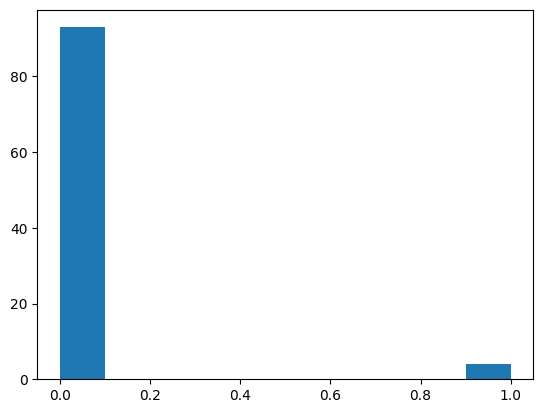

In [ ]:
from matplotlib import pyplot as plt
plt.hist(outlier_doc_intersect)
plt.show()

у аномалии 0 пересечений для около 100 документов группы

только 1 пересечение с одной веб-страницей по одному слову

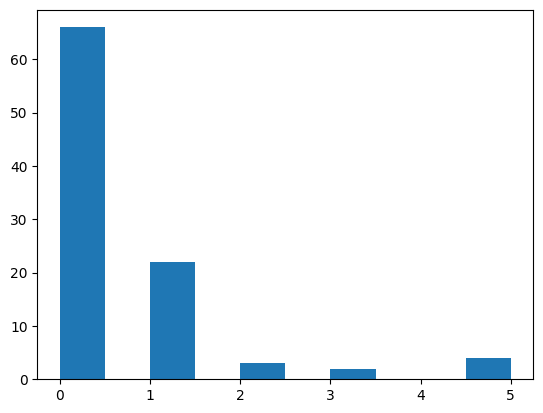

In [ ]:
plt.hist(true_doc_intersect)
plt.show()

У настоящего документа 0 пересечений с около 70 другими документами группы

Пересечение в одно слово с около 20 документами группы

В два, три и пять слов еще с некоторыми другими документами группы

Разница в гистрограмме огромная! Значит метод должен сработать.

Теперь посчитаем общие слова для всех групп и всех веб-страниц. Как мы видели ранее, у аномалий максимум общих слов значительно меньше. Но чтобы подстраховаться от пары выбросов с одинаковыми словами в заголовке, возьмем не один максимум, а все топ-n значений. Например, как признаки для веб-страницы, возьмем значения топ-15  пересечений с другими страницами из группы.

In [ ]:
traingroups_titledata

In [ ]:
import numpy as np
y_train = []
X_train = []
groups_train = []

# Проходимся по всем группам
for new_group in traingroups_titledata:
    # Документы, которые относятся к текущей группе
    docs = traingroups_titledata[new_group]
    # Проходимся по всем документам группы
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        # Сохраняем группу рассматриваемого документа
        groups_train.append(new_group)
        all_dist = []
        # Слова рассматриваемого документам
        words = set(title.strip().split())
        # Проходимся по всем документам группы для поиска пересечений с рассматриваемым документом
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            # Слова сравниваемого документа группы
            words_j = set(title_j.strip().split())
            # Сохраняем количество общих слов двух документов
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [ ]:
# Храним топ-15 количеств общих слов документа с другими документами группы
# Строка отвечает за документ
# Столбец - число общих слов этого документа с другими документами группы
# Фича 1 - максимум общих слов, фича 2 - премаксимум общих слов ...
X_train

array([[4, 4, 3, ..., 2, 1, 1],
       [8, 7, 7, ..., 2, 2, 2],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [6, 2, 1, ..., 1, 1, 1],
       [3, 2, 2, ..., 1, 1, 1]])

Отрисуем классы в пространстве первых двух признаков.

Видно, что выбросы в среднем  расположены слева снизу, но есть и несколько исключений из этого правила.

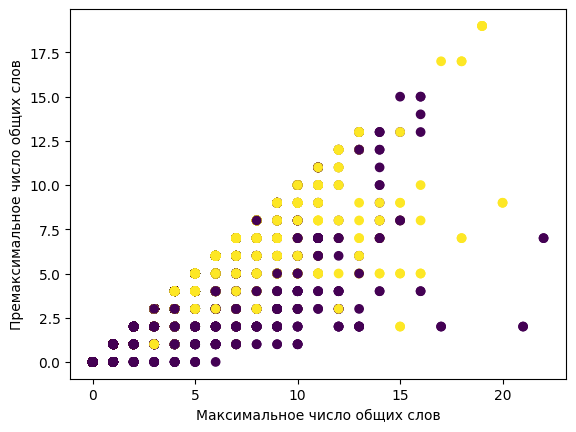

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.ylabel('Премаксимальное число общих слов')
plt.xlabel('Максимальное число общих слов')
plt.show()

$\textbf{Задание:}$

1) Разбейте выборку на обучение и валидацию (как это сделать правильно? не забудьте, как разбиты группы в обучении и тесте, валидация должна повторять эту логику)

2) Обучите метод ближайшего соседа, проверьте  качество на валидации. Не забудьте использовать нормализацию признаков!

3) Не забывайте, что метод ближайшего соседа не оптимизирует F1. Как по выходу метода ближайшего соседа сделать оптимальное предсказание с точки зрения метрики F1?

__Ответ__: При сплите в валидации не должно быть групп из трейна

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, classification_report

In [ ]:
splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_indices, val_indices = next(splitter.split(X_train, y_train, groups_train))

X_train_split = X_train[train_indices]
y_train_split = y_train[train_indices]

X_val_split = X_train[val_indices]
y_val_split = y_train[val_indices]

groups_train_split = groups_train[train_indices]
groups_val_split = groups_train[val_indices]

(X_train_split.shape, y_train_split.shape, groups_train_split.shape), (X_val_split.shape, y_val_split.shape, groups_val_split.shape)

(((8246, 15), (8246,), (8246,)), ((3444, 15), (3444,), (3444,)))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)

In [ ]:
def evaluate_knn_with_optimal_threshold(X_train, y_train, X_val, y_val, neighbors_range):
    best_neighbors = None
    best_threshold = None
    best_f1 = 0

    for n_neighbors in neighbors_range:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)

        y_val_proba = knn.predict_proba(X_val)[:, 1]

        precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)
        f1_scores = 2 * (precision * recall) / (precision + recall)
        optimal_idx = f1_scores.argmax()
        optimal_threshold = thresholds[optimal_idx]
        optimal_f1 = f1_scores[optimal_idx]

        if optimal_f1 > best_f1:
            best_f1 = optimal_f1
            best_neighbors = n_neighbors
            best_threshold = optimal_threshold

    return best_neighbors, best_threshold, best_f1

neighbors_range = range(1, 21)


best_neighbors, best_threshold, best_f1 = evaluate_knn_with_optimal_threshold(
    X_train_scaled, y_train_split, X_val_scaled, y_val_split, neighbors_range)

(best_neighbors, best_threshold, best_f1)

(19, 0.3684210526315789, 0.4732996065205172)

In [ ]:
knn_optimal = KNeighborsClassifier(n_neighbors=best_neighbors)
knn_optimal.fit(X_train_scaled, y_train_split)

y_val_proba_optimal = knn_optimal.predict_proba(X_val_scaled)[:, 1]
y_val_pred_optimal = (y_val_proba_optimal >= best_threshold).astype(int)

accuracy_optimal = accuracy_score(y_val_split, y_val_pred_optimal)
report_optimal = classification_report(y_val_split, y_val_pred_optimal)

print(accuracy_optimal)
print(report_optimal)

0.7279326364692218
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2785
           1       0.38      0.64      0.47       659

    accuracy                           0.73      3444
   macro avg       0.64      0.69      0.64      3444
weighted avg       0.80      0.73      0.75      3444



Если успешно справились, сделайте предсказание на тестовом множестве и залейте Ваше решение на платформу kaggle.  Посмотрите результат, попробуйте его улучшить. Потом еще раз улучшить :)

Вы готовы заниматься анализом данных!

In [ ]:
test_data = pd.read_csv('test_groups.csv')
test_data.head()

,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


Мы с Вами рассмотрели один из вариантов построения признаков в задаче. Однако, это не значит, что другие варианты построения признаков не имеют права на жизнь. Некоторые веб-страницы вообще нельзя присоединить к тематике (спам, например) или, возможно, некоторые группы задают широкую тему (холодильники), а некоторые более узкую (холодильники сделанные в  Советском Союзе в 80х годах). Таким образом, признаки, которыми мы будем описывать пару (группа, веб-страница) можно разделить на:

1) Зависят от пары (группа, веб-страница) самые важные признаки

2) Зависят от группы

3) Зависят от веб-страницы

Мы в рассмотрели только самую важную (на наш взгляд) первую группу.

## 4. Правила конкурса

Конкурс проходит на платформе kaggle по адресу, который есть в чате и на портале.



Основные правила:
1. Соревнование длится до конца курса
2. Баллы будут проставлены в зависимости от итоговой позици команды в рейтинге
3. При непродолении бейзлайна проект для команды не считается засчитанным
4. Команда может быть не более 3 человек
5. Весь код должен быть закомичен на гитхаб для проверки

Чего делать нельзя (карается незащитой проекта):
1. Обмениваться кодом между командами вне общего слака
2. Использовать ручную разметку

Чем можно пользоваться:
любыми алгоритмами, любыми дополнительными данными.



## 5. Советы по решению

Перечислим здесь идеи, которые пришли нам самим в голову. Это только наше мнение, ему следовать не обязательно :)

1. Использовать нормализацию текста при подсчете текстовой похожести (см. лекцию 11 или интернет, библиотеку nltk, pymorphy)
2. Очевидно, просто число общих слов не идеальная метрика похожести. Как минимум, не учитывает длину, не учитывает, что бывают популярные слова (в, и, на), которые везде встречаются.
3. Брать другую информацию из html страницы (url, body, meta...)
4. Попробовать лучше понять структуру в рамках одной группы с помощью методов кластеризации и добавить ее выход в признаки (см лекцию 8 или интернет)
5. Посмотреть в сторону методов детекции аномалий, которые явным образом в курсе не рассматриваются (см интернет, например, вот https://dyakonov.org/2017/04/19/поиск-аномалий-anomaly-detection/) и их выход добавлять в признаки
6. Попробовать разные алгоритмы машинного обучения

Интутивно кажется, что в этом конкурсе  важнее построение признаков, чем сам алгоритм, но, возможно, интуиция нас подводит.

Cоветы не только на этот конкурс:
1. Смотреть на данные, только так можно придумать хорошее решение
2. Обычно, самые красивые решения являются самыми простыми (см http://alexanderdyakonov.narod.ru/intro2datamining.pdf http://alexanderdyakonov.narod.ru/lpotdyakonov.pdf). Постарайтесь их найти :)
3. Не доверять полностью публичному значению качества на kaggle, ВСЕГДА использовать валидацию
4. Пробовать усреднять предсказания разных моделей, это может работать лучше, чем каждая по отдельности.


Удачи!